# Final Project 3: Ensemble

- Celin Manongko - PYTN-KS10-018
- Alina Florencia Karuniawati - PYTN-KS10-001
- Nine Alvariqati Varqa Ansori - PYTN-KS10-010

# Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from statsmodels.stats.diagnostic import normal_ad

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Data Loading

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Dataset ini terdiri dari 299 baris dan 13 kolom yang terdiri atas:
1. age - umur pasien
2. anaemia - apakah ada pengurangan hemoglobin (0: No, 1: Yes)
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes (0: No, 1: Yes)
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi (0: No, 1: Yes)
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita (Male: 1, Female: 0)
11. smoking - apakah pasien merokok (0: No, 1: Yes)
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up (0: No, 1: Yes)

# Background Analysis

Penyakit kardiovaskular merupakan salah satu penyebab kematian nomor satu secara global. Penyakit ini telah merenggut kurang lebih 17,9 juta nyawa setiap tahunnya atau dapat dikatakan 31% dari seluruh kematian di dunia.

Dalam dataset ini terdapat 12 fitur yang dapat dimanfaatkan untuk melakukan prediksi terhadap kematian akibat gagal jantung. Sebagian besar penyakit kardiovaskular dpaat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan rokok. Dalam hal ini, orang dengan penyakit kardiovaskular atau memiliki risiko terhadap jenis penyakit tersebut memerlukan deteksi dan penanganan secara dini. Oleh karena itu, dilakukan pemodelan dengan menggunakan machine learning untuk dapat memprediksi penyakit kardiovaskular.

# Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Berdasarkan informasi di atas dapat dilihat bahwa tiap kolom telah memiliki tipe data yang sesuai

# Check Duplicated Data

In [4]:
df.duplicated().sum()

0

Berdasarkan pengecekan di atas, tidak ada data yang duplikat

# Check Missing Values

In [5]:
for col in df:
    print("Nilai unik dalam kolom: ", col.upper())
    print(df[col].unique())

Nilai unik dalam kolom:  AGE
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
Nilai unik dalam kolom:  ANAEMIA
[0 1]
Nilai unik dalam kolom:  CREATININE_PHOSPHOKINASE
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  

Berdasarkan pengecekan nilai unique di setiap kolom tidak terdapat data yang bernilai aneh

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Dari pengecekan di atas tidak terdapat missing values

# Descriptive Statistics

In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


- Rata-rata umur pasien yang mengidap penyakit jantung adalah 60.8 tahun. Pasien penyakit jantung yang paling muda berumur 40 tahun, sedangkan yang paling tua berumur 95 tahun. 
- Rata-rata level enzim CPK pasien adalah sebesar 581.84 mcg/L. Level enzim CPK pasien yang paling rendah bernilai sebesar 23 mcg/L. Sementara itu, level enzim CPK yang paling tinggi berada di angka 7861 mcg/L.
- Rata-rata persentase darah yang meninggalkan jantung di setiap kontraksi jantung pada pasien adalah sebesar 38.08%. Persentase darah yang meninggalkan jantung di setiap kontraksi jantung pada pasien yang paling rendah adalah sebesar 14%, sedangkan yang paling tinggi bernilai sebesar 80%.
- Rata-rata jumlah platelet di darah pasien adalah sebesar 263358.029264 kiloplatelets/mL. Jumlah platelet di daerah pasien yang paling rendah adalah sebesar 25100 kiloplatelets/ml. Sementara itu, jumlah platelet yang paling tinggi adalh sebesar 850000.
- Rata-rata level serum creatinine di dalam darah pasien penyakit jantung adalah sebesar 1.39 mg/dL. Jumlah serum creatinine di dalam darah pasien yang paling rendah adalah sebesar 0.5, sedangkan yang paling tinggi adalah sebesar 9.4.
- Rata-rata serum sodium di dalam darah pasien penyakit jantung adalah sebesar 136.62 mEq/L. Jumlah serum sodium yang paling rendah di dalam daerah pasien adalah sebesar 113 mEq/L. Sedangkan, jumlah serum sodium yang paling tinggi adalah sebesar 148 mEq/L.
- Rata-rata waktu follow up pasien penyakit jantung adalah sebesar 130.26 hari. Waktu paling cepat untuk follow up pasien penyakit jantung adalah dalam 4 hari. Sementara itu, waktu follow up pasien penyakit jantung yang paling lama adalah dalam 285 hari.

# Exploratory Data Analysis

## Proportion of Smoking Patient, Patient Gender, and Patient who has disease

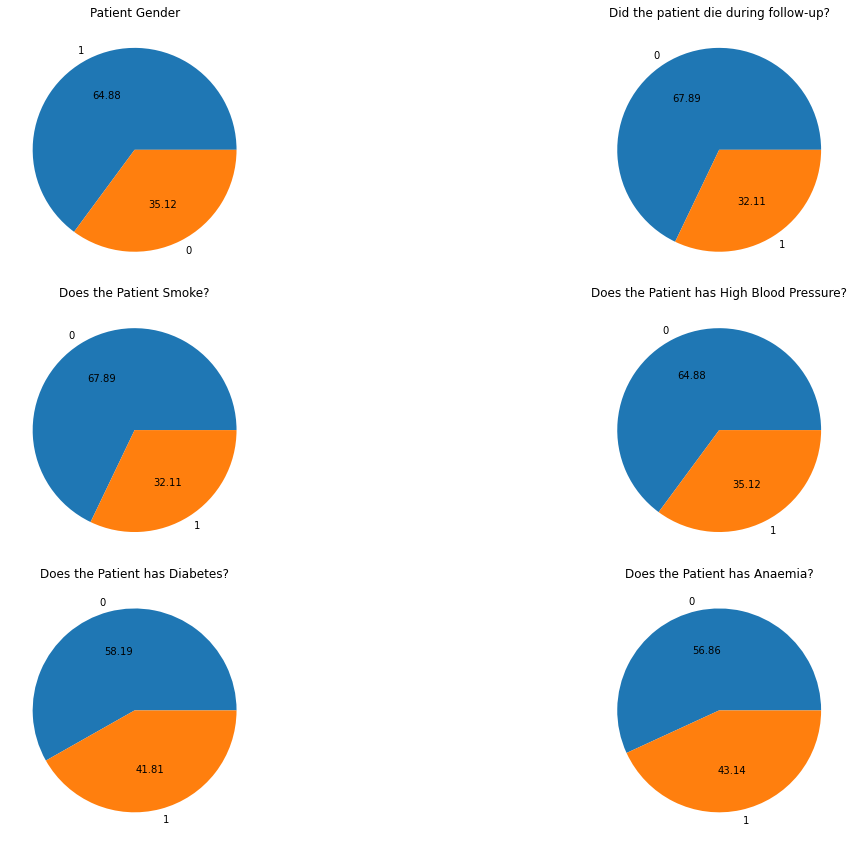

In [8]:
fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=.1, wspace=.1)

ax = fig.add_subplot(3,2,1)
df.sex.value_counts().plot(kind='pie',autopct='%.2f')
plt.ylabel('')
ax.set_title('Patient Gender')

ax = fig.add_subplot(3,2,2)
df.DEATH_EVENT.value_counts().plot(kind='pie',autopct='%.2f')
plt.ylabel('')
ax.set_title('Did the patient die during follow-up?')

ax = fig.add_subplot(3,2,3)
df.smoking.value_counts().plot(kind='pie',autopct='%.2f')
plt.ylabel('')
ax.set_title('Does the Patient Smoke?')

ax = fig.add_subplot(3,2,4)
df.high_blood_pressure.value_counts().plot(kind='pie',autopct='%.2f')
plt.ylabel('')
ax.set_title('Does the Patient has High Blood Pressure?')

ax = fig.add_subplot(3,2,5)
df.diabetes.value_counts().plot(kind='pie',autopct='%.2f')
plt.ylabel('')
ax.set_title('Does the Patient has Diabetes?')

ax = fig.add_subplot(3,2,6)
df.anaemia.value_counts().plot(kind='pie',autopct='%.2f')
plt.ylabel('')
ax.set_title('Does the Patient has Anaemia?')

plt.show()

Berdasarkan pie chart di atas dapat ditarik beberapa insight: 
- Pasien penyakit jantung sebagian besar berjenis kelamin laki-laki dengan persentase sebesar 64.88%
- Sebagian besar pasien penyakit jantung tidak memiliki memiliki riwayat merokok dengan persentase sebesar 67.89%
- Pasien penyakit jantung yang memiliki riwayat diabetes memiliki persentase yang lebih kecil (41.81%) daripada pasien penyakit jantung yang tidak memiliki riwayat diabetes (58.19%)
- Pasien penyakit jantung yang sudah meninggal saat waktu follow-up proporsinya cukup kecil, yaitu sebesar 32.11%
- Sebagian besar pasien penyakit jantung tidak memiliki penyakit darah tinggi, dengan persentase sebesar 64.88%
- Pasien penyakit jantung yang mengalami pengurangan hemoglobin persentasenya bernilai sebesar 43.14%.

## Proportion of Age

In [9]:
def age_category(age):
    if age <= 40:
        return "0-40"
    elif age > 40 and age <= 50:
        return "40-50"
    elif age > 50 and age <= 60:
        return "50-60"
    elif age > 60:
        return "60+"
    
df['age category'] = df['age'].apply(age_category)

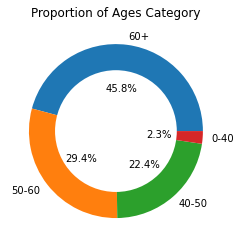

In [10]:
label = ['60+','50-60','40-50','0-40']

plt.pie(df['age category'].value_counts(), labels = label, autopct='%1.1f%%', pctdistance=0.5)

center_circle = plt.Circle((0,0),0.70, fc='white')

fig = plt.gcf()

fig.gca().add_artist(center_circle)

plt.title("Proportion of Ages Category")

plt.show()

45.8% pasien penyakit jantung berasal dari orang-orang yang tergolong pada kelompok umur 60+ atau dapat dikatakan sebagian besar pasien penyakit jantung merupakan lansia

## Scatter Plot of Age vs Creatinine Phosphokinase, Ejection Fraction, Platelets, Serum Creatinine, Serum Sodium

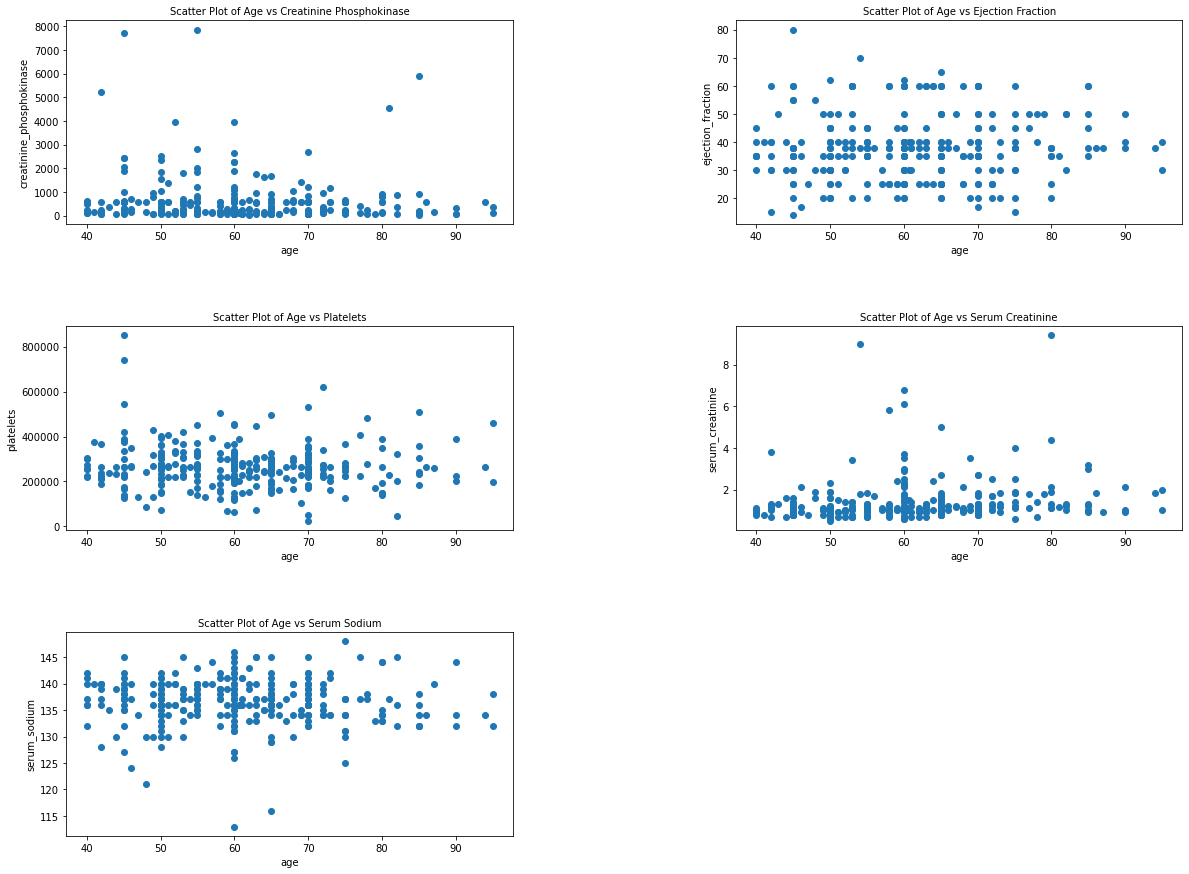

In [11]:
fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(3,2,1)
plt.scatter(df.age,df.creatinine_phosphokinase)
plt.ylabel('creatinine_phosphokinase')
plt.xlabel('age')
ax.set_title("Scatter Plot of Age vs Creatinine Phosphokinase", fontsize=10)

ax = fig.add_subplot(3,2,2)
plt.scatter(df.age,df.ejection_fraction)
plt.ylabel('ejection_fraction')
plt.xlabel('age')
ax.set_title("Scatter Plot of Age vs Ejection Fraction", fontsize=10)

ax = fig.add_subplot(3,2,3)
plt.scatter(df.age,df.platelets)
plt.ylabel('platelets')
plt.xlabel('age')
ax.set_title("Scatter Plot of Age vs Platelets", fontsize=10)

ax = fig.add_subplot(3,2,4)
plt.scatter( df.age,df.serum_creatinine)
plt.ylabel('serum_creatinine')
plt.xlabel('age')
ax.set_title("Scatter Plot of Age vs Serum Creatinine", fontsize=10)

ax = fig.add_subplot(3,2,5)
plt.scatter( df.age,df.serum_sodium)
plt.ylabel('serum_sodium')
plt.xlabel('age')
ax.set_title("Scatter Plot of Age vs Serum Sodium", fontsize=10)

plt.show()

Tidak terdapat hubungan linear antara umur dengan creatine phospokinase, serum creatinine, ejection fraction, platelets, dan serum sodium.

## Diseases Trend based on Ages

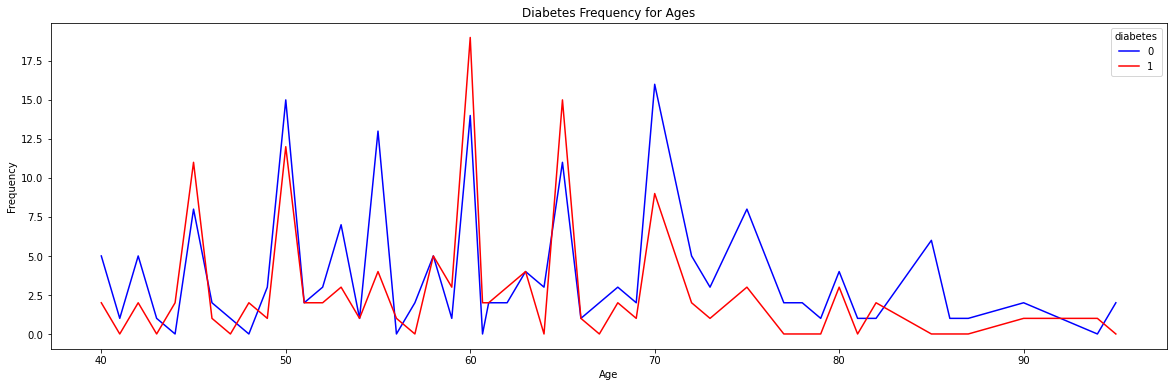

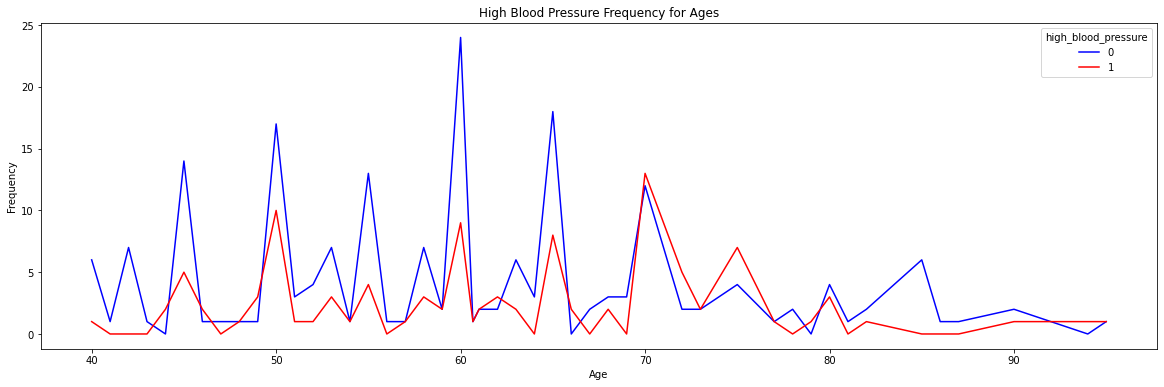

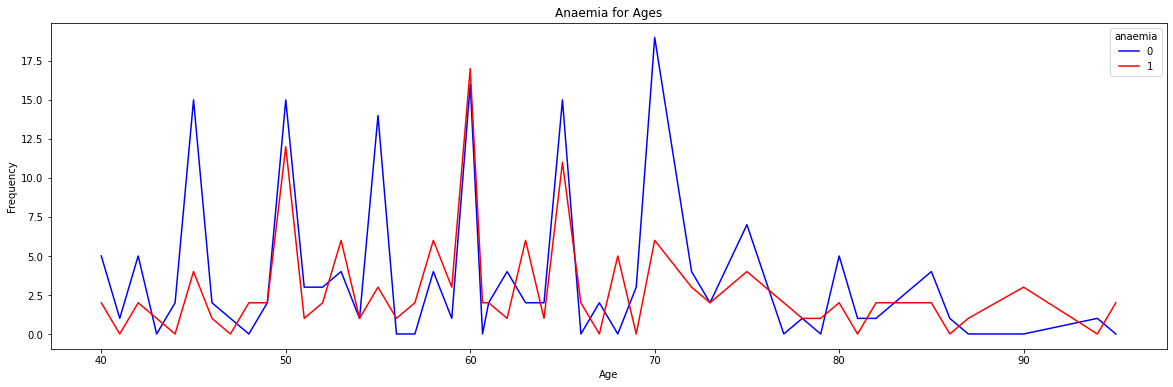

In [12]:
pd.crosstab(df.age,df.diabetes).plot(kind="line",figsize=(20,6),color= ['blue','red'])
plt.title('Diabetes Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

pd.crosstab(df.age,df.high_blood_pressure).plot(kind="line",figsize=(20,6),color= ['blue','red'])
plt.title('High Blood Pressure Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

pd.crosstab(df.age,df.anaemia).plot(kind="line",figsize=(20,6),color= ['blue','red'])
plt.title('Anaemia for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

Dari line chart di atas dapat ditarik beberapa insight:
- Pasien penyakit jantung yang memiliki penyakit diabetes paling banyak adalah pasien yang berusia 60 tahun
- Pasien penyakit jantung yang memiliki tekanan darah tinggi paling banyak adalah pasien yang berusia 70 tahun
- Pasien penyakit jantung yang memiliki penyakit anemia (kekurangan darah) paling banyak adalah pasien yang berusia 60 tahun

## Age Category vs Death Event

In [13]:
df6gr = df[['age category','DEATH_EVENT']].groupby(['age category', 'DEATH_EVENT']).agg({'DEATH_EVENT': 'count'})

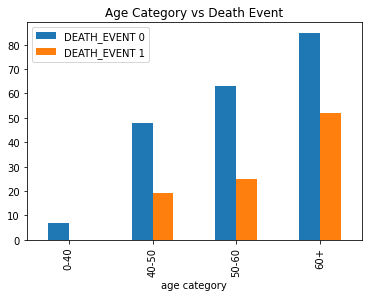

In [14]:
df6gr.unstack().plot(kind='bar')
plt.legend(['DEATH_EVENT 0','DEATH_EVENT 1'])
plt.title('Age Category vs Death Event')
plt.show()

Pasien yang paling banyak meninggal ketika follow up adalah pasien yang berusia 60 tahun ke atas

## Distribution of Numerical Column

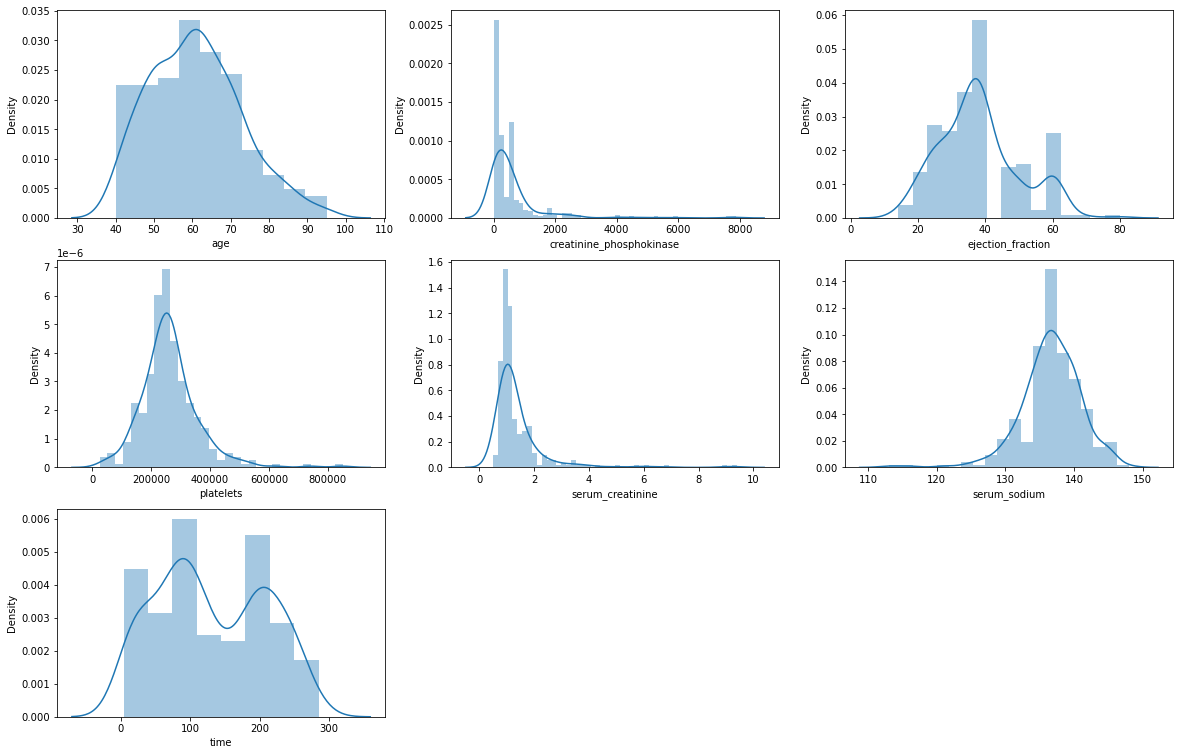

In [15]:
numerical = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

fig = plt.figure(figsize=(20,13))
for i in range(len(numerical)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[numerical[i]])

Berdasarkan visualisasi di atas dapat ditarik beberapa insight:
- Distribusi dari umur pasien tidak tergolong symmetric
- Distribusi dari creatinine phospokinase tergolong right skewed
- Distribusi dari ejection fraction tidak tergolong symmetric
- Distribusi dari platelets tidak tergolong symmetric
- Distribusi dari serum_creatinine tergolong right skewed
- Distribusi dari serum_sodium tergolong left skewed
- Distribusi dari time tergolong bimodal

$H_0$ : **`Umur pasien berdistribusi normal`** <br>
$H_1$ : **`Umur pasien tidak berdistribusi normal`** <br>

$H_0$ : **`creatinine_phosphokinase berdistribusi normal`** <br>
$H_1$ : **`creatinine_phosphokinase tidak berdistribusi normal`** <br>

$H_0$ : **`ejection fraction berdistribusi normal`** <br>
$H_1$ : **`ejection fraction tidak berdistribusi normal`** <br>

$H_0$ : **`platelets berdistribusi normal`** <br>
$H_1$ : **`platelets tidak berdistribusi normal`** <br>

$H_0$ : **`serum_creatinine berdistribusi normal`** <br>
$H_1$ : **`serum_creatinine tidak berdistribusi normal`** <br>

$H_0$ : **`serum sodium berdistribusi normal`** <br>
$H_1$ : **`serum sodium tidak berdistribusi normal`** <br>

$H_0$ : **`waktu follow-up berdistribusi normal`** <br>
$H_1$ : **`waktu follow-up tidak berdistribusi normal`** <br>

In [16]:
p_value = normal_ad(df['age'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

if p_value < 0.05:
    print('Null hypothesis ditolak dan umur pasien tidak berdistribusi normal')
else:
    print('Null hypothesis tidak ditolak dan umur pasien berdistribusi normal')

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0003170792205080348
Null hypothesis ditolak dan umur pasien tidak berdistribusi normal


In [17]:
p_value = normal_ad(df['creatinine_phosphokinase'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

if p_value < 0.05:
    print('Null hypothesis ditolak dan creatinine_phosphokinase tidak berdistribusi normal')
else:
    print('Null hypothesis tidak ditolak dan creatinine_phosphokinase berdistribusi normal')

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0
Null hypothesis ditolak dan creatinine_phosphokinase tidak berdistribusi normal


In [18]:
p_value = normal_ad(df['ejection_fraction'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

if p_value < 0.05:
    print('Null hypothesis ditolak dan ejection fraction tidak berdistribusi normal')
else:
    print('Null hypothesis tidak ditolak dan ejection fraction berdistribusi normal')

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 2.5897795854533962e-14
Null hypothesis ditolak dan ejection fraction tidak berdistribusi normal


In [19]:
p_value = normal_ad(df['platelets'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

if p_value < 0.05:
    print('Null hypothesis ditolak dan platelets tidak berdistribusi normal')
else:
    print('Null hypothesis tidak ditolak dan platelets berdistribusi normal')

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 2.3057959513658265e-12
Null hypothesis ditolak dan platelets tidak berdistribusi normal


In [20]:
p_value = normal_ad(df['serum_creatinine'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

if p_value < 0.05:
    print('Null hypothesis ditolak dan serum_creatinine tidak berdistribusi normal')
else:
    print('Null hypothesis tidak ditolak dan serum_creatinine berdistribusi normal')

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0
Null hypothesis ditolak dan serum_creatinine tidak berdistribusi normal


In [21]:
p_value = normal_ad(df['serum_sodium'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

if p_value < 0.05:
    print('Null hypothesis ditolak dan serum sodium tidak berdistribusi normal')
else:
    print('Null hypothesis tidak ditolak dan serum sodium berdistribusi normal')

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 8.902300260147212e-08
Null hypothesis ditolak dan serum sodium tidak berdistribusi normal


In [22]:
p_value = normal_ad(df['time'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

if p_value < 0.05:
    print('Null hypothesis ditolak dan waktu follow-up tidak berdistribusi normal')
else:
    print('Null hypothesis tidak ditolak dan waktu follow-up berdistribusi normal')

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 2.5589893746791596e-12
Null hypothesis ditolak dan waktu follow-up tidak berdistribusi normal


## Death Event vs Anemia, Diabetes, High Blood Pressure, Smoking, and Sex

In [23]:
df1gr = df[['anaemia', 'DEATH_EVENT']].groupby(['anaemia', 'DEATH_EVENT']).agg({'DEATH_EVENT': 'count'})
df2gr = df[['diabetes', 'DEATH_EVENT']].groupby(['diabetes', 'DEATH_EVENT']).agg({'DEATH_EVENT': 'count'})
df3gr = df[['high_blood_pressure', 'DEATH_EVENT']].groupby(['high_blood_pressure', 'DEATH_EVENT']).agg({'DEATH_EVENT': 'count'})
df4gr = df[['smoking', 'DEATH_EVENT']].groupby(['smoking', 'DEATH_EVENT']).agg({'DEATH_EVENT': 'count'})
df5gr = df[['sex', 'DEATH_EVENT']].groupby(['sex', 'DEATH_EVENT']).agg({'DEATH_EVENT': 'count'})

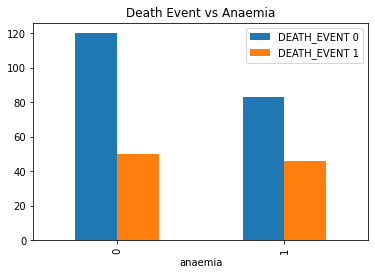

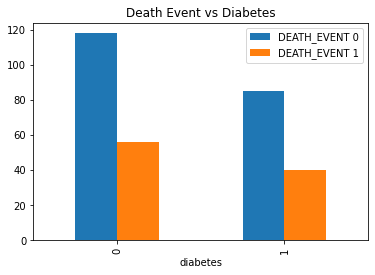

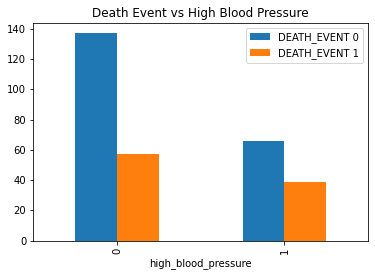

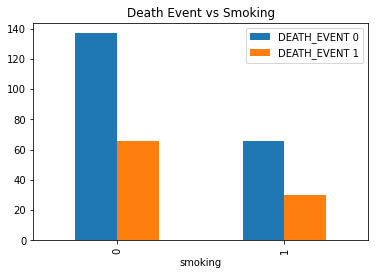

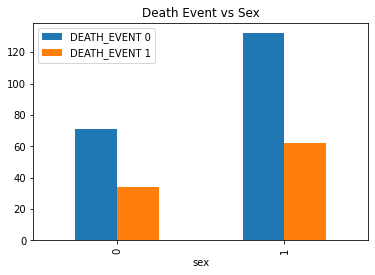

In [24]:
df1gr.unstack().plot(kind='bar')
plt.legend(['DEATH_EVENT 0','DEATH_EVENT 1'])
plt.title('Death Event vs Anaemia')

df2gr.unstack().plot(kind='bar')
plt.legend(['DEATH_EVENT 0','DEATH_EVENT 1'])
plt.title('Death Event vs Diabetes')

df3gr.unstack().plot(kind='bar')
plt.legend(['DEATH_EVENT 0','DEATH_EVENT 1'])
plt.title('Death Event vs High Blood Pressure')

df4gr.unstack().plot(kind='bar')
plt.legend(['DEATH_EVENT 0','DEATH_EVENT 1'])
plt.title('Death Event vs Smoking')

df5gr.unstack().plot(kind='bar')
plt.legend(['DEATH_EVENT 0','DEATH_EVENT 1'])
plt.title('Death Event vs Sex')
plt.show()

Dari bar chart di atas dapat ditarik beberapa insight:
- Pasien dengan jenis kelamin laki-laki lebih banyak yang meninggal ketika follow up daripada pasien dengan jenis kelamin wanita
- Pasien yang tidak merokok lebih banyak yang meninggal daripada pasien yang merokok
- Pasien yang tidak memiliki darah tinggi lebih banyak yang meninggal daripada pasien yang memiliki darah tinggi 
- Pasien yang tidak memiliki riwayat diabetes lebih banyak yang meninggal daripada pasien yang memiliki riwayat diabetes
- Pasien yang tidak memiliki riwayat anemia lebih banyak yang meninggal daripada pasien yang memiliki riwayat anemia

# Data preprocessing

## Remove Additional Column (Age Category)

In [25]:
df.drop(['age category'], axis=1, inplace=True)

## Split Data

Pada splitting data, kami membagi data menjadi testing dengan proporsi sebesar 20% dan training sebesar 80%

In [26]:
train, test = train_test_split(df, test_size=0.2, random_state=11)
train_index = train.index
test_index = test.index

In [27]:
train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
113,70.0,1,143,0,60,0,351000.0,1.3,137,0,0,90,1
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14,1
60,45.0,0,7702,1,25,1,390000.0,1.0,139,1,0,60,1
228,65.0,0,56,0,25,0,237000.0,5.0,130,0,0,207,0
130,53.0,1,1808,0,60,1,249000.0,0.7,138,1,1,106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,45.0,1,130,0,35,0,174000.0,0.8,139,1,1,121,0
269,40.0,0,582,1,35,0,222000.0,1.0,132,1,0,244,0
91,60.0,0,897,1,45,0,297000.0,1.0,133,1,0,80,0
80,70.0,0,69,0,40,0,293000.0,1.7,136,0,0,75,0


In [28]:
y_train = train[['DEATH_EVENT']]
X_train = train.drop(['DEATH_EVENT'], axis=1)

In [29]:
y_test = test[['DEATH_EVENT']]
X_test = test.drop(['DEATH_EVENT'], axis=1)

# Modelling with Random Forest

## Model Fitting

In [30]:
rf = RandomForestClassifier(max_features = 0.5, max_depth =5, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

## Model Evaluation

### Testing Data

In [31]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.74      0.82      0.78        17

    accuracy                           0.87        60
   macro avg       0.83      0.85      0.84        60
weighted avg       0.87      0.87      0.87        60



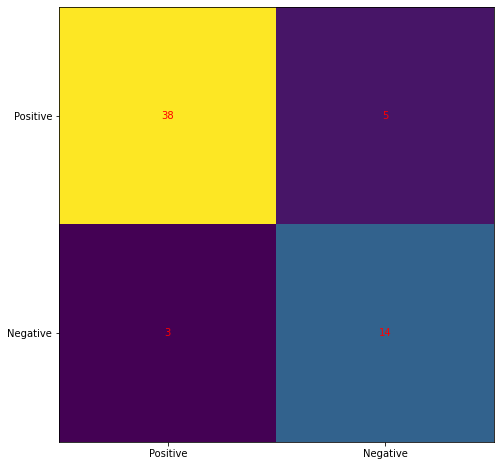

In [33]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Berdasarkan confusion matrix di atas dapat dilihat bahwa prediksi True Positive dan True Negative lebih banyak dari False Positive dan False Negative. Oleh karena itu, dapat dikatakan pemodelan ini sudah cukup baik

### Training Data

In [34]:
y_pred1 = rf.predict(X_train)

In [35]:
print('Accuracy:', metrics.accuracy_score(y_train, y_pred1))

Accuracy: 0.9414225941422594


In [36]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       160
           1       0.96      0.86      0.91        79

    accuracy                           0.94       239
   macro avg       0.95      0.92      0.93       239
weighted avg       0.94      0.94      0.94       239



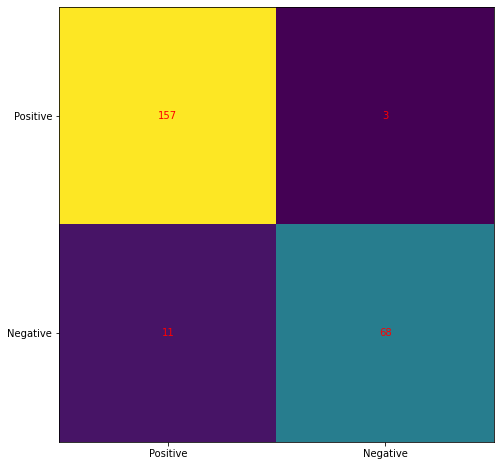

In [37]:
cm = confusion_matrix(y_train, y_pred1)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Berdasarkan confusion matrix di atas dapat dilihat bahwa prediksi True Positive dan True Negative lebih banyak dari False Positive dan False Negative. Oleh karena itu, dapat dikatakan pemodelan ini sudah cukup baik

# Comparison between Testing and Training Data

In [38]:
compared = pd.DataFrame({'Keterangan':['Training Data','Testing Data'],'Accuracy':[metrics.accuracy_score(y_train, y_pred1),  metrics.accuracy_score(y_test, y_pred)]})
compared

,Keterangan,Accuracy
0,Training Data,0.941423
1,Testing Data,0.866667


Berdasarkan perbandingan di atas dapat dikatakan bahwa model random forest untuk prediksi dataset heart failure tergolong overfitting karena training data memiliki akurasi yang lebih tinggi daripada testing data

# Modelling with  Ada Boost

In [39]:
ab = AdaBoostClassifier(random_state=1)
ab.fit(X_train, y_train)
y_pred2 = ab.predict(X_train)

## Model Evaluation

### Training Data

In [40]:
print('Accuracy:', metrics.accuracy_score(y_train, y_pred2))

Accuracy: 0.9581589958158996


In [41]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       160
           1       0.95      0.92      0.94        79

    accuracy                           0.96       239
   macro avg       0.96      0.95      0.95       239
weighted avg       0.96      0.96      0.96       239



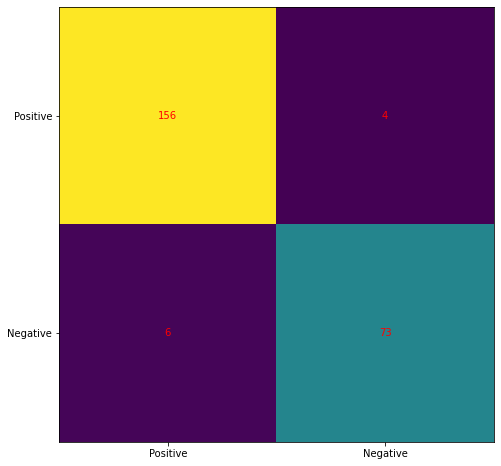

In [42]:
cm = confusion_matrix(y_train, y_pred2)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Berdasarkan confusion matrix di atas dapat dilihat bahwa prediksi True Positive dan True Negative lebih banyak dari False Positive dan False Negative. Oleh karena itu, dapat dikatakan pemodelan ini sudah cukup baik

### Testing Data

In [43]:
y_pred3 = ab.predict(X_test)

In [44]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.7666666666666667


In [45]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        43
           1       0.57      0.71      0.63        17

    accuracy                           0.77        60
   macro avg       0.72      0.75      0.73        60
weighted avg       0.79      0.77      0.77        60



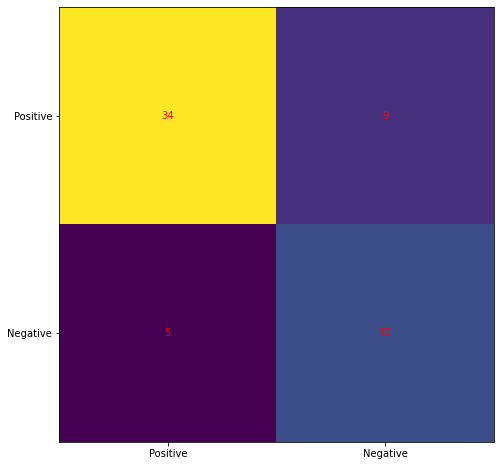

In [46]:
cm = confusion_matrix(y_test, y_pred3)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Berdasarkan confusion matrix di atas dapat dilihat bahwa prediksi True Positive dan True Negative lebih banyak dari False Positive dan False Negative. Oleh karena itu, dapat dikatakan pemodelan ini sudah cukup baik

# Comparison between Testing and Training Data

In [47]:
compared = pd.DataFrame({'Keterangan':['Training Data','Testing Data'],'Accuracy':[metrics.accuracy_score(y_train, y_pred2),  metrics.accuracy_score(y_test, y_pred3)]})
compared

,Keterangan,Accuracy
0,Training Data,0.958159
1,Testing Data,0.766667


Berdasarkan perbandingan di atas dapat dikatakan bahwa model AdaBoost untuk prediksi dataset heart failure tergolong overfitting karena training data memiliki akurasi yang lebih tinggi daripada testing data

# Comparison Between the Model

## Training Data

In [48]:
models = ['Random Forest', 'Ada Boost']
akurasi_skor_training = {'Metode':models, 'Akurasi':[metrics.accuracy_score(y_train, y_pred1),metrics.accuracy_score(y_train, y_pred2)]}
akurasi_skor_training = pd.DataFrame(akurasi_skor_training)
akurasi_skor_training

,Metode,Akurasi
0,Random Forest,0.941423
1,Ada Boost,0.958159


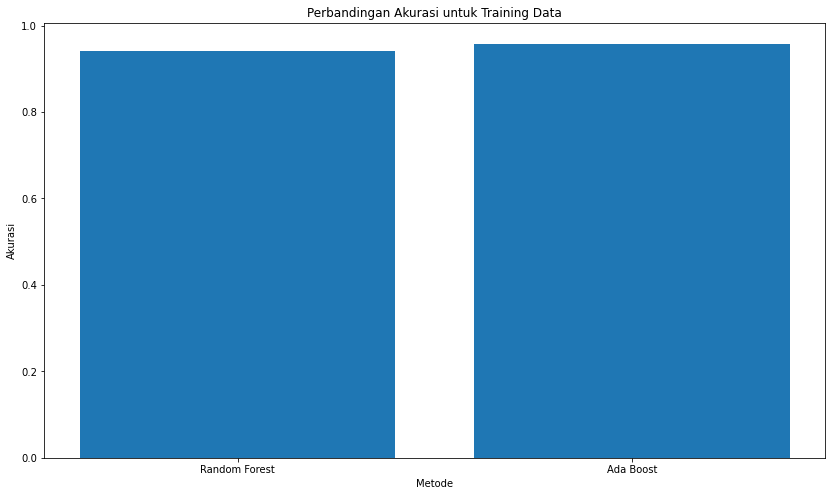

In [49]:
plt.subplots(figsize=(14, 8))
plt.bar(akurasi_skor_training['Metode'], akurasi_skor_training['Akurasi'])
plt.title("Perbandingan Akurasi untuk Training Data")
plt.ylabel("Akurasi")
plt.xlabel("Metode")
plt.show()

Ada Boost memiliki akurasi yang lebih tinggi daripada Random Forest untuk data training

## Testing Data

In [50]:
models = ['Random Forest', 'Ada Boost']
akurasi_skor_testing = {'Metode':models, 'Akurasi':[metrics.accuracy_score(y_test, y_pred),metrics.accuracy_score(y_test, y_pred3)]}
akurasi_skor_testing = pd.DataFrame(akurasi_skor_testing)
akurasi_skor_testing

,Metode,Akurasi
0,Random Forest,0.866667
1,Ada Boost,0.766667


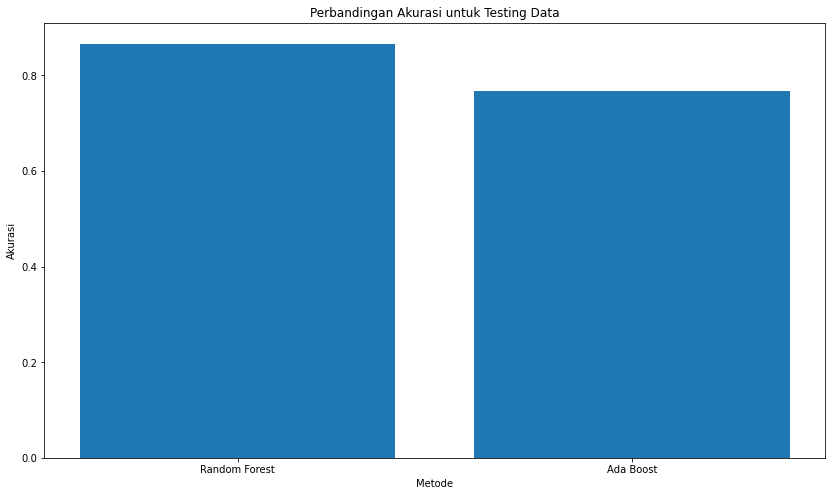

In [51]:
plt.subplots(figsize=(14, 8))
plt.bar(akurasi_skor_testing['Metode'], akurasi_skor_testing['Akurasi'])
plt.title("Perbandingan Akurasi untuk Testing Data")
plt.ylabel("Akurasi")
plt.xlabel("Metode")
plt.show()

Random Forest memiliki akurasi yang lebih tinggi daripada Ada Boost untuk data testing

# Conclusion

Berdasarkan analisis yang telah dilakukan dapat ditarik beberapa kesimpulan:
- Rata-rata waktu follow up pasien penyakit jantung adalah sebesar 130.26 hari. Waktu paling cepat untuk follow up pasien penyakit jantung adalah dalam 4 hari. Sementara itu, waktu follow up pasien penyakit jantung yang paling lama adalah dalam 285 hari.
- Rata-rata umur pasien yang mengidap penyakit jantung adalah 60.8 tahun. Pasien penyakit jantung yang paling muda berumur 40 tahun, sedangkan yang paling tua berumur 95 tahun.
- Pasien penyakit jantung sebagian besar berjenis kelamin laki-laki dengan persentase sebesar 64.88%
- Sebagian besar pasien penyakit jantung tidak memiliki memiliki riwayat merokok dengan persentase sebesar 67.89%
- Sebagian besar pasien penyakit jantung tidak memiliki memiliki riwayat diabetes dengan persentase sebesar 58.19%
- Pasien penyakit jantung yang sudah meninggal saat waktu follow-up proporsinya cukup kecil, yaitu sebesar 32.11%
- Sebagian besar pasien penyakit jantung tidak memiliki penyakit darah tinggi, dengan persentase sebesar 64.88%
- Pasien penyakit jantung yang mengalami pengurangan hemoglobin persentasenya bernilai sebesar 43.14%.
- 45.8% pasien penyakit jantung berasal dari orang-orang yang tergolong pada kelompok umur 60+ 
- Pasien penyakit jantung yang memiliki penyakit diabetes paling banyak adalah pasien yang berusia 60 tahun
- Pasien penyakit jantung yang memiliki tekanan darah tinggi paling banyak adalah pasien yang berusia 70 tahun
- Pasien penyakit jantung yang memiliki penyakit anemia (kekurangan darah) paling banyak adalah pasien yang berusia 60 tahun
- Pasien yang paling banyak meninggal ketika follow up adalah pasien yang berusia 60 tahun ke atas
- Pasien dengan jenis kelamin laki-laki lebih banyak yang meninggal ketika follow up daripada pasien dengan jenis kelamin wanita
- Pasien yang tidak merokok lebih banyak yang meninggal daripada pasien yang merokok
- Pasien yang tidak memiliki darah tinggi lebih banyak yang meninggal daripada pasien yang memiliki darah tinggi 
- Pasien yang tidak memiliki riwayat diabetes lebih banyak yang meninggal daripada pasien yang memiliki riwayat diabetes
- Pasien yang tidak memiliki riwayat anemia lebih banyak yang meninggal daripada pasien yang memiliki riwayat anemia
- Model terbaik untuk heart failure prediction adalah Random Forest karena memiliki akurasi testing yang lebih tinggi daripada Ada Boost

# Deployment

In [52]:
import pickle

with open("randomforest.pkl","wb") as f:
    pickle.dump(rf,f)

In [53]:
#buat pipeline
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    RandomForestClassifier(max_features = 0.5, max_depth =5, random_state=1)
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_features=0.5,
                                        random_state=1))])

In [54]:
with open("pipeline.pkl","wb") as f:
    pickle.dump(pipe,f)

In [55]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.74      0.82      0.78        17

    accuracy                           0.87        60
   macro avg       0.83      0.85      0.84        60
weighted avg       0.87      0.87      0.87        60



In [56]:
X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
69,65.0,0,113,1,25,0,497000.00,1.83,135,1,0,67
77,42.0,0,102,1,40,0,237000.00,1.20,140,1,0,74
278,50.0,1,1051,1,30,0,232000.00,0.70,136,0,0,246
254,53.0,1,446,0,60,1,263358.03,1.00,139,1,0,215
260,55.0,0,66,0,40,0,203000.00,1.00,138,1,0,233
53,70.0,1,69,1,50,1,351000.00,1.00,134,0,0,44
12,45.0,1,981,0,30,0,136000.00,1.10,137,1,0,11
179,55.0,0,835,0,40,0,279000.00,0.70,140,1,1,147
97,70.0,1,59,0,60,0,255000.00,1.10,136,0,0,85
86,55.0,0,47,0,35,1,173000.00,1.10,137,1,0,79


In [57]:
X_test.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')